In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path1 = "/Users/laurasuemitsu/Desktop/DATA_FT_May_2025/Week 5/Project/df_final_web_data_merged.csv"

In [3]:
df1 = pd.read_csv(path1)

In [4]:
path2 = "/Users/laurasuemitsu/Desktop/DATA_FT_May_2025/Week 5/Project/df_final_experiment_clients.csv"

In [5]:
df2 = pd.read_csv(path2)
df2.drop(columns=("Unnamed: 0"), inplace=True)

In [6]:
df_merged = df1.merge(df2, how="left", on="client_id")
df_merged.dropna(inplace=True)
df_merged.head()

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test


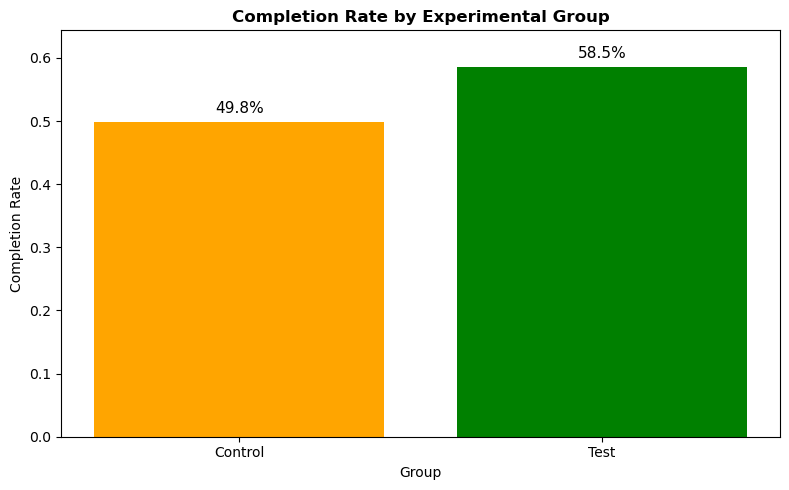

In [7]:
completion_df = df_merged[df_merged["process_step"] == "confirm"]
completion_rate = completion_df.groupby("Variation")["visit_id"].nunique() / df_merged.groupby("Variation")["visit_id"].nunique()

# Drawing the plot
plt.figure(figsize=(8, 5))
bars = plt.bar(completion_rate.index, completion_rate.values, color=["orange", "green"])

# Add values (in percentages)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{height*100:.1f}%",     
        ha='center', va='bottom', fontsize=11
    )

# Formating
plt.title("Completion Rate by Experimental Group", fontweight="bold")
plt.ylabel("Completion Rate")
plt.xlabel("Group")
plt.ylim(0, 1.1 * completion_rate.max()) 
plt.tight_layout()
plt.show()

**H0:** mu completion rate test = completion rate control

**H1:** mu completion rate test != completion rate control

In [12]:
from statsmodels.stats.proportion import proportions_ztest

In [13]:
completion_df

,client_id,visitor_id,visit_id,process_step,date_time,Variation
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05,Test
13,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control
14,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,Control
15,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,Control
24,1982004,618934751_10082078917,132494692_73738638511_70823,confirm,2017-04-17 12:02:42,Test
...,...,...,...,...,...,...
637400,6230585,100189756_32488226026,671811152_97876326241_999687,confirm,2017-05-08 09:29:38,Test
637423,4977550,795300798_27713164444,423005536_66563748376_701196,confirm,2017-05-25 15:19:39,Control
637462,6426623,27047012_3402532492,685634090_42070675506_389171,confirm,2017-05-19 05:40:14,Control
637467,433098,5505424_50616523266,773565250_67577573147_389841,confirm,2017-05-13 15:33:04,Control


In [18]:
successes_df = completion_df.value_counts(subset=["Variation"])
successes_df.head()

Variation
Test         25722
Control      17505
Name: count, dtype: int64

In [27]:
successes = [successes_df["Test"], successes_df["Control"]]


In [25]:
tries_df = df_merged.value_counts(subset=["Variation"])

In [29]:
tries = [tries_df["Test"], tries_df["Control"]]

In [30]:
proportions_ztest(successes, tries)

(18.67324116863663, 8.173840595991908e-78)